# CSC-321: Data Mining and Machine Learning

## Working with scikit-learn - Trees

In this notebook, I'll demonstrate a decision tree, using the IRIS data set
It uses another library - graphviz - to display the final tree


class
Feature names: ['class' 'cap-shape_b' 'cap-shape_c' 'cap-shape_f' 'cap-shape_k'
 'cap-shape_s' 'cap-shape_x' 'cap-surface_f' 'cap-surface_g'
 'cap-surface_s' 'cap-surface_y' 'cap-color_b' 'cap-color_c' 'cap-color_e'
 'cap-color_g' 'cap-color_n' 'cap-color_p' 'cap-color_r' 'cap-color_u'
 'cap-color_w' 'cap-color_y' 'bruises_f' 'bruises_t' 'odor_a' 'odor_c'
 'odor_f' 'odor_l' 'odor_m' 'odor_n' 'odor_p' 'odor_s' 'odor_y'
 'gill-attachment_a' 'gill-attachment_f' 'gill-spacing_c' 'gill-spacing_w'
 'gill-size_b' 'gill-size_n' 'gill-color_b' 'gill-color_e' 'gill-color_g'
 'gill-color_h' 'gill-color_k' 'gill-color_n' 'gill-color_o'
 'gill-color_p' 'gill-color_r' 'gill-color_u' 'gill-color_w'
 'gill-color_y' 'stalk-shape_e' 'stalk-shape_t' 'stalk-root_b'
 'stalk-root_c' 'stalk-root_e' 'stalk-root_r' 'stalk-surface-above-ring_f'
 'stalk-surface-above-ring_k' 'stalk-surface-above-ring_s'
 'stalk-surface-above-ring_y' 'stalk-surface-below-ring_f'
 'stalk-surface-below-ring_k' 'stalk-surface-

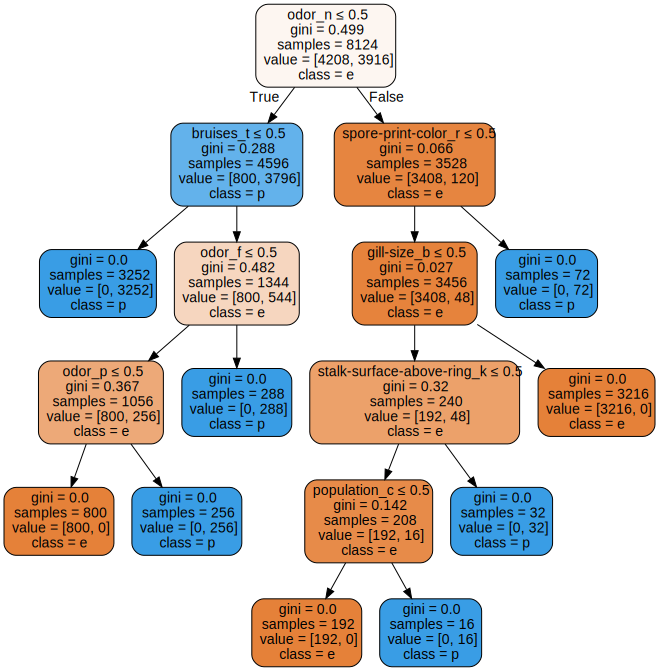

In [12]:
import graphviz 
from sklearn import tree
from sklearn.datasets import load_iris
import pandas
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE


#print("Done")

dataframe = pandas.read_csv('mushrooms.csv')
le = LabelEncoder()
dataframe['class'] = le.fit_transform(dataframe['class'])
dataframe = pandas.get_dummies(dataframe)
dataframe = dataframe.drop(columns = ['stalk-root_?'])
names = dataframe.columns.values
array = dataframe.values
X = array[:,1:117]
y = array[:,0]
print(names[0])

log = LogisticRegression(solver='liblinear')
rfe = RFE(estimator=log, step=1)
rfe.fit(X, y)
print("Feature names:",names)
print("Feature ranking:",rfe.ranking_)

print('\n\n***Slicing data to include ONLY features ranked 1***\n\n')

# I use pandas (badly) to do this, slicing by column names
# I extract the column names from the ranking, above
# There's better ways to do this, but it's late and I'm tired

newCols = []
index = 0
for i in rfe.ranking_:
    if i <= 1:
        newCols.append(names[index])
    index+=1
newCols.append('class')    
newData = dataframe[dataframe.columns[dataframe.columns.isin(newCols)]]


# Extract the training and test data from the pandas data frame

array = newData.values
names = newData.columns.values
print('length: ', len(array[0]))
X = array[:,1:len(array[0])]
y = array[:,0]

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("mushrooms")

dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=names[1:],  
                     class_names=['e', 'p'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph